<a href="https://colab.research.google.com/github/ianxdxd/ML-Study/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class LinearRegression:
    def __init__(self, n_iter: int, l_rate: float):
        self.n_iter = n_iter
        self.l_rate = l_rate
        self.w = None

    def init_weights(self, n_features: float):
        # use [-1/sqr(n), +1/sqr(n)] to initiliaze weights
        lim = 1 / np.sqrt(n_features)
        self.w = np.random.uniform(-lim, lim, n_features)

    def predict(self, X):
        return np.dot(X, self.w)

    def fit_gd(self, X, y):
        n_samples = X.shape[0]
        X = X.reshape(-1, 1) # transform into a column vector
        self.error = []
        self.init_weights(X.shape[1])

        for i in range(self.n_iter):
            y_pred = self.predict(X)
            error = y - y_pred
            self.error.append(np.float64(np.mean(0.5 * ((error)**2)) + np.linalg.norm(self.w))) # regularize to avoid overfitting
            grad_w = -2 * np.dot(X.T, error) / n_samples # Compute the grad of the MSE loss function
            self.w -= self.l_rate * grad_w

    def fit_leastSquares(self, X, y):
        X_mean = np.mean(X)
        y_mean = np.mean(y)

        numerator = 0
        denominator = 0
        for i in range(X.shape[0]):
            numerator += (X[i] - X_mean) * (y[i] - y_mean)
            denominator += (X[i] - X_mean) ** 2

        m = numerator / denominator
        c = y_mean - m * X_mean
        return m, c

        # mx + C

    def fit_leastSquares_MoorePenrose(self, X, y):
        X = X.reshape(-1, 1)
        X = np.hstack((X, np.ones(X.shape[0]).reshape(-1, 1)))  # Add bias term

        # self.weight = np.dot(np.linalg.pinv(X.T.dot(X)), X.T).dot(y) # direct way

        # SVD method is computationally expansive but more numerically stable
        # compared to the direct way
        # Xinv = V@D^+@U^T
        U, D, V = np.linalg.svd(X.T.dot(X))  # SVD decomposition
        D = np.diag(D)  # Convert D to a diagonal matrix
        X_inv = V.dot(np.linalg.pinv(D)).dot(U.T) # moore penrose pseudo inverse
        self.weight = X_inv.dot(X.T).dot(y)
        return self.weight[0], self.weight[1]

class LogisticRegression:
    def __init__(self, n_iter: int, l_rate: float):
        self.n_iter = n_iter
        self.l_rate = l_rate


Final MSE using Gradient Descent:  3.5886245111026605
Final MSE using Least Squares:  0.6905043382174522
Final MSE using Least Squares Moore Penrose:  0.6905043382174522


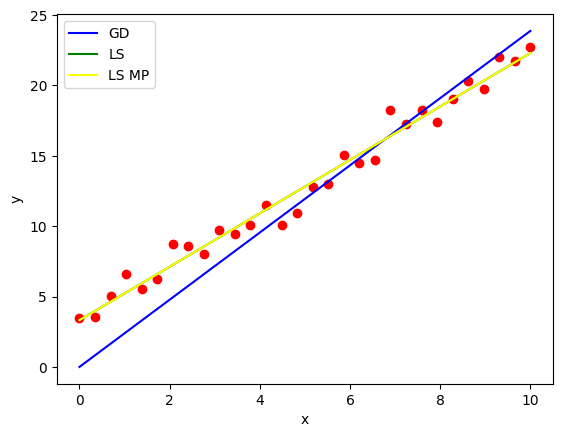

In [4]:
np.random.seed(42)
# y = 2x + 3
X = np.linspace(0, 10, 30)
y = 2 * X + 3 + np.random.normal(0, 1, X.shape) # add noise to make it more realistic

reg = LinearRegression(n_iter=1000, l_rate=0.01)

reg.fit_gd(X, y)
y_line_gd = reg.predict(X.reshape(-1, 1))
final_mse_gd = np.mean((y - y_line_gd) ** 2)

m,c = reg.fit_leastSquares(X, y)
y_line_ls = m*X + c
final_mse_ls = np.mean((y - y_line_ls) ** 2)

m_mp, c_mp = reg.fit_leastSquares_MoorePenrose(X, y)
y_line_ls_mp = m_mp*X + c_mp
final_mse_ls_mp = np.mean((y - y_line_ls_mp) ** 2)

print("Final MSE using Gradient Descent: ", final_mse_gd)
print("Final MSE using Least Squares: ", final_mse_ls)
print("Final MSE using Least Squares Moore Penrose: ", final_mse_ls_mp)

plt.scatter(X, y, color='red')
plt.plot(X, y_line_gd, color='blue', label='GD')
plt.plot(X, y_line_ls, color='green', label='LS')
plt.plot(X, y_line_ls_mp, color='yellow', label='LS MP')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()